# Chapter 4: Logistic Regression

In [12]:
#%reset
low_memory=False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## 4.1 Introduction & Motivation

We've seen what linear regression can do, and we've seen the power of polynomial regression. Now with Logistic regression we are starting to dip out toes in the wonderful world of classification. Instead of trying to predict a number we are now trying to predict a **label**.

## 4.2 Problem Setting

Today we will be working with the Pima Indians Diabetics dataset. In this dataset is information regarding a whole bunch of women older than 21 years old of Pima Indian origin. The goal is to try and predict which women have **diabetes** and which do not. This is represented by the 'Outcome' column, where 1 means the person has diabetes and 0 means she does not.

## 4.3 Model

First, let's have a look at the data.

In [13]:
df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Question 1: Explore the data by creating a heatmap. Which variables would you use when trying to predict diabetes and why?

<Axes: >

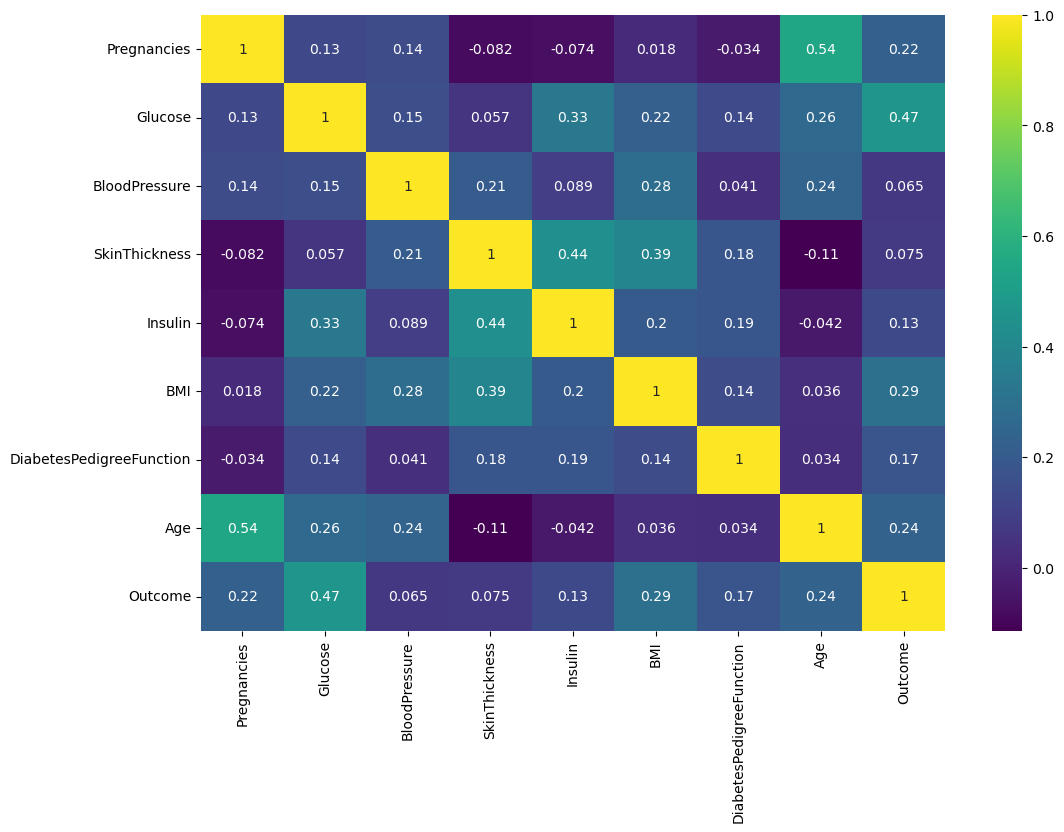

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

We can see the three variables with the highest correlation to 'Outcome' are 'Glucose', 'BMI' and 'Age'. Those variables will most likely result in the best model. This is because they have the higest number in the correlation matrix.

The variables with the lowest correlation are those closest to 0, in this case that would be 'BloodPressure' and 'SkinThickness'.

##### Question 2: Create a train and test split of the data. Keep 30% of your data as testing data. Build your model using only the best parameter as found in question 1. For now, you can leave the solver at the default setting and keep the max_iter at 10000.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df["Outcome"], test_size=0.30, random_state=0)
model = LogisticRegression(max_iter=10000)
model.fit(X_train['Glucose'].to_numpy().reshape(-1, 1), y_train)

LogisticRegression(max_iter=10000)

##### Question 3: A person has a glucose level of 125. Predict if this person has diabetes or not.

In [16]:
model.predict([[125]])

array([0])

No, a person with a glucose level of 125 most likely does **not** have diabetes according to our model.

## 4.4 Model Evaluation

We have made our first prediction, but of course we don't know how well we can trust this yet. To know this, we first need to evaluate our model.

##### Question 4: Calculate all known classification metrics for your model. Are these values any good? Elaborate based on the formulas and meaning of the metrics.

In [17]:
pred_test = model.predict(X_test['Glucose'].to_numpy().reshape(-1, 1))
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('Specificity:', specificity_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))

Accuracy: 0.7445887445887446
Precision: 0.6470588235294118
Recall: 0.44594594594594594
Specificity: 0.8853503184713376
F1 Score: 0.528


- We have an accuracy of 0.74, meaning 74% of our test predictions were correct. This is already a good start for a first model.
- Our overall precision is 0.64, which is not bad but still rather on the low end. Ideally we would want this to be a bit higher, for example more in the range of 0.7 - 0.8.
- Our Recall is 0.44, meaning our model has a terrible TPR. It is not good at correctly predicting a person has diabetes.
- Our specificity is 0.88, meaning our model has a rather good TNR. It is pretty good at correctly predicting a person does not have diabetes.
- The overall F1 score is 0.528. This is to be expected, as it takes a balance between Recall and Specificity. Since Recall is so low, we expect F1 to also be rather low.

##### Question 5: Based on your findings, is this model any good? Would you prefer a high recall or specificity in this use case? Why?

There is certainly room for improvement, however with an accuracy of 0.74 the model is already pretty good. The recall score is rather low, however in this case we want a higher specificity, which we have. Since we are trying to predict diabetes, it is more important to first identify the persons who do not have diabetes so we can perform extra tests on and gather more data from the persons we are unsure about.

##### Question 6: Plot the confuson matrix. How can you visually confirm your previous findings?

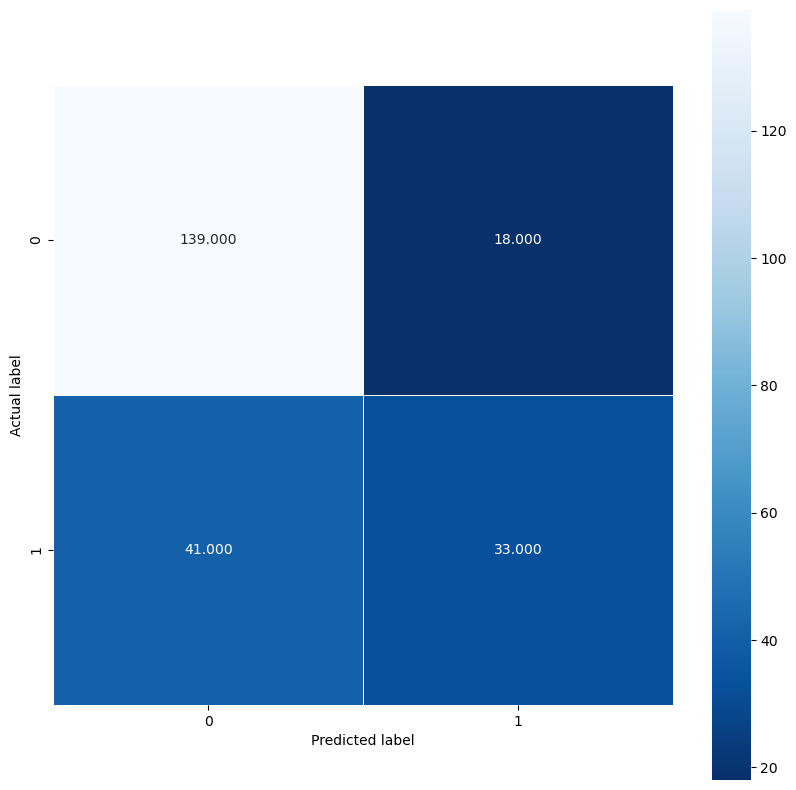

In [18]:
cm = metrics.confusion_matrix(y_test, pred_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

We can see that no diabetes is predicted correctly quite a lot compared to diabetes. Keep in mind that we are not directly comparing the 139 with 33, since it could be that our dataset happens to contain less records where a person has diabetes. Instead we are looking at the the amount of people we correctly identified as not having diabetes overthe ones we did not correctly identify vs the amount of people we correctly identified as having diabetes over the amont of people we did not correctly identify.

Visually, we can quicklly confirm this by looking at the diagonal and noticing a high value for correctly identified people without diabetes, meaning our model performs better when identifying people who do not have diabetes.

## 4.5 Questions

##### Question 1: See section 4.3

##### Question 2: See section 4.3

##### Question 3: See section 4.3

##### Question 4: See section 4.4

##### Question 5: See section 4.4

##### Question 6: See section 4.4

##### Question 7: Play around with the different "solvers" (lbfgs, saga, newton-cg) and different levels of max_iteration. Which model results in the best accuracy?

In [19]:
solvers = ['lbfgs', 'saga', 'newton-cg']
iterations = [10, 100, 1000, 10000, 100000, 1000000]

for solver in solvers:
    print ('Solving with', solver)
    for max_iter in iterations:
        print ('\tMax iterations', max_iter)
        logisticRegr = LogisticRegression(max_iter=max_iter, solver=solver)
        logisticRegr.fit(X_train['Glucose'].to_numpy().reshape(-1, 1), y_train)
        score = model.score(X_test['Glucose'].to_numpy().reshape(-1, 1), y_test)
        print('\t\t', score)

Solving with lbfgs
	Max iterations 10
		 0.7445887445887446
	Max iterations 100
		 0.7445887445887446
	Max iterations 1000
		 0.7445887445887446
	Max iterations 10000
		 0.7445887445887446
	Max iterations 100000
		 0.7445887445887446
	Max iterations 1000000
		 0.7445887445887446
Solving with saga
	Max iterations 10
		 0.7445887445887446
	Max iterations 100
		 0.7445887445887446
	Max iterations 1000
		 0.7445887445887446
	Max iterations 10000
		 0.7445887445887446
	Max iterations 100000
		 0.7445887445887446
	Max iterations 1000000


c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which me

		 0.7445887445887446
Solving with newton-cg
	Max iterations 10
		 0.7445887445887446
	Max iterations 100
		 0.7445887445887446
	Max iterations 1000
		 0.7445887445887446
	Max iterations 10000
		 0.7445887445887446
	Max iterations 100000
		 0.7445887445887446
	Max iterations 1000000
		 0.7445887445887446


Generally speaking we expect a higher number of iterations giving us a higher accuracy. However, in this case it seems like all solvers perform eaqual, no matter the amount of iterations.

##### Question 8: Go back to the correlation matrix we drew in section 4.3. Figure out which other features might be useful when predicting diabetes. Retrain your model and calculate all metrics. Play around with other possible features and create some new ones to try the interaction effect. What is the best model you can achieve?

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[['Glucose', 'BMI', 'Age', 'Pregnancies']], df["Outcome"], test_size=0.30, random_state=0)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('Specificity:', specificity_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))

Accuracy: 0.7575757575757576
Precision: 0.6666666666666666
Recall: 0.4864864864864865
Specificity: 0.8853503184713376
F1 Score: 0.5625


When using the four columns with the highest correlation to diabetes, we can see a slight improvement, meaning in general we have a better model. We see all of our scores have improved Most importantly, our F1 score has risen ever so slightly. Let's see if we can get this even higher. We can try to figure out which columns might lead us to the best rusults using trial and error or various other methods. After doing so and even creating some extra features for interaction columns, this was the best model I was able to come up with:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Outcome"], axis = 1), df["Outcome"], test_size=0.30, random_state=0)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('Specificity:', specificity_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))

Accuracy: 0.7792207792207793
Precision: 0.7090909090909091
Recall: 0.527027027027027
Specificity: 0.8980891719745223
F1 Score: 0.6046511627906976


When using all available data we get an even better model. Noticeably, out recall score has risen above 0.5 and our F1 score is the highest it has ever been.

Can we conclude that this is for certain the best model we can create? No. We got this model through trial and error, and there are many more unexplored options that might yield better results. Later in this course we will cover some techniques which will help us identify these potential better options. For now, we are focussing on manually playing with the diferent settings and thinking about what exact impact this has on our model.

##### Question 9: Consider the person with values as described below. Using only the features you're using in your best model, does this person have diabetes or not?

| Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age |
| --- | --- |--- |--- |--- |--- |--- |--- |
| 8 | 190 | 92 | 41 | 33.6 | 39.3 | 0.278 | 52 |

In [22]:
model.predict([[8, 190, 92, 41, 33.6, 9.3, 0.278, 52]])

c:\Users\billo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Our model predicts 1. This means that yes, the person likely has diabetes.